In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
df = pd.read_csv("house_dataset.csv")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size      10 non-null     float64
 1   floors    10 non-null     float64
 2   location  10 non-null     float64
 3   price     10 non-null     float64
dtypes: float64(4)
memory usage: 452.0 bytes


In [140]:
y = np.array(df.price)
print(y.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(10,)
(10, 1)


In [141]:
x = np.array(df[['size','floors','location']].values ) # shape: (10,3)

In [142]:
print(x.shape,y.shape)

(10, 3) (10, 1)


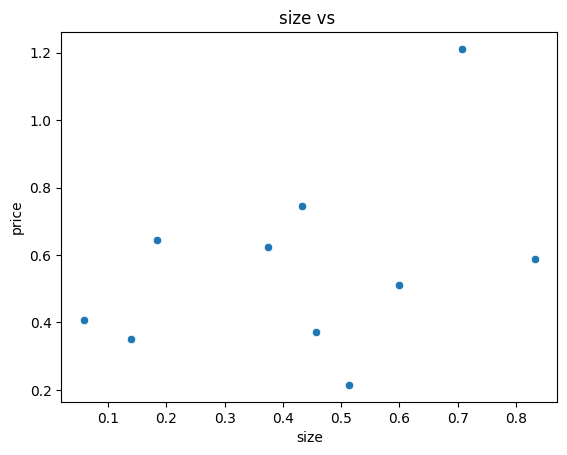

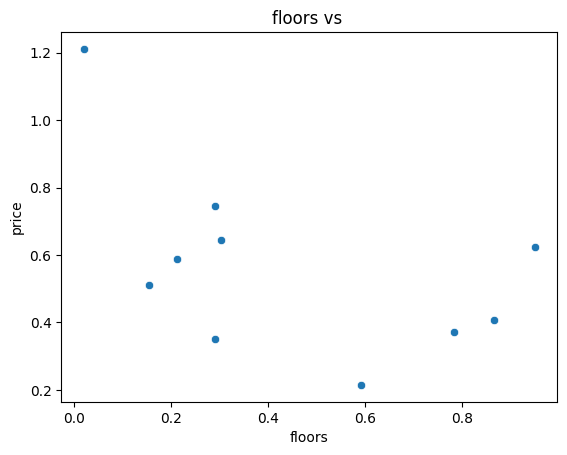

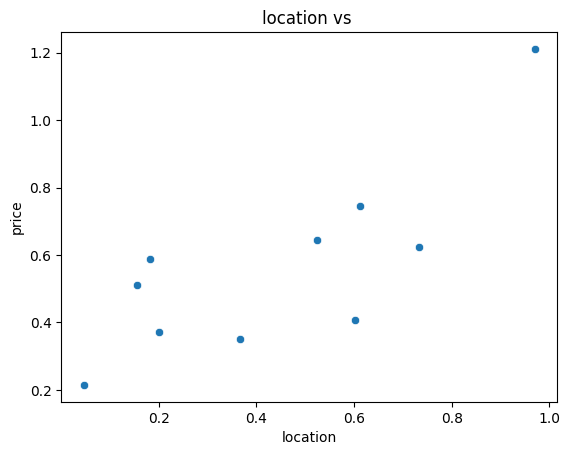

In [143]:
features = ['size','floors','location']

for col in features:
    sns.scatterplot(x = df[col],y = df['price'])
    plt.title(f"{col} vs ")
    plt.show()
    

In [144]:
print(df.corr())

              size    floors  location     price
size      1.000000 -0.470803 -0.178346  0.391389
floors   -0.470803  1.000000 -0.039139 -0.521177
location -0.178346 -0.039139  1.000000  0.782781
price     0.391389 -0.521177  0.782781  1.000000


<h5>
    <ul>
    <li>size vs price (+0.39): This indicates a positive relation, although not a strong one which indicates that as size increases, price increases but not aggresively</li>
    <li>floors vs price (-0.59): This indicates a negative relationship that states as the number of floors increases, prices decreases        </li>
    <li>location vs price (0.78): This indicates a strong positive relationship, as location score increases, prices increases</li>
    </ul>
</h5>

<h3>Correlation only measures pairwise relationships, the combined linear model could predict/reflect something different</h3>

In [145]:
#We now start our linear regression model
# Initialize parameters w & b
w = np.array([[0,0,0]])
b = 0

In [146]:
#We need to check the shape of our w and x in order for the matrix multiplication
print(x.shape,w.shape)

(10, 3) (1, 3)


In [147]:
#Since our shapes dont allign, matrix multiplication is not possible, we need to reshape our parameter w to (3,1) or use a transpose
w = w.reshape(3,1)
print(w.shape)

(3, 1)


<h3>Cost Function

In [148]:
#We will use vectorization of NumPy 
def cost_function(x,w,b,y):
    y_hat = np.dot(x,w)+b
    error = (y_hat - y)**2
    error = np.sum(error)
    m = x.shape[0]
    mse = 1/(2*m) * error
    return mse

<h3>Gradient Descent

In [149]:
def compute_gradients(x,w,b,y,alpha):
    m = x.shape[0]
    f_wb = np.dot(x,w)+b
    error = f_wb - y
    dw = (1/m) * np.dot(x.T,error)
    db = (1/m) * np.sum(error)
    w = w - alpha * dw
    b = b- alpha * db
    return w,b

In [150]:
cost_function(x,w,b,y)

np.float64(0.19556872801519334)

In [151]:
compute_gradients(x,w,b,y,0.01)

(array([[0.00268169],
        [0.00211149],
        [0.00307118]]),
 np.float64(0.005671883531000001))

In [152]:
cost_history = []
iterations = 1000
for i in range(iterations):
    w, b = compute_gradients(x, w, b, y, 0.01)
    cost = cost_function(x, w, b, y)
    cost_history.append(cost)
    # optional: print(cost) to monitor convergence


In [153]:
print(f"Final w: {w}, b: {b}")

Final w: [[ 0.28139704]
 [-0.16144284]
 [ 0.47979708]], b: 0.3121866144645424


Text(0.5, 1.0, 'Cost vs Iterations')

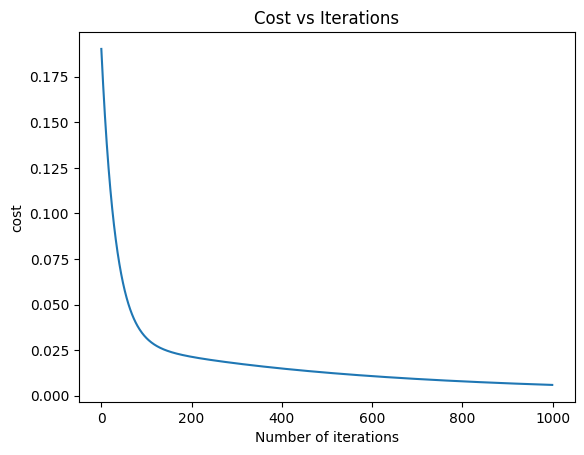

In [164]:
plt.plot(range(iterations),cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('cost')
plt.title("Cost vs Iterations")